In [1]:
import glob
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
hexagon_dir = "E:/output/nieuwkoopse_plassen/*merge*hexagons_res12*"

In [6]:
trends = []
for afile in glob.glob(hexagon_dir):
    afile = afile.replace("\\","/")
    print(afile)

    adf = gpd.read_file(afile)

    trends.append([adf['date'].value_counts().index[0], adf['label'].value_counts().loc['Waterplants'] ])



E:/output/nieuwkoopse_plassen/2019_bloom_period_merge_ndwi_ndvi_hexagons_res12.geojson
E:/output/nieuwkoopse_plassen/2020_bloom_period_merge_ndwi_ndvi_hexagons_res12.geojson
E:/output/nieuwkoopse_plassen/2021_bloom_period_merge_ndwi_ndvi_hexagons_res12.geojson
E:/output/nieuwkoopse_plassen/2022_bloom_period_merge_ndwi_ndvi_hexagons_res12.geojson


In [7]:
# 2023 exception
file_2023 = "E:/output/nieuwkoopse_plassen/20230603_104624_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn_Nieuwkoopse_Plassen_De_Haeck_cropped_ndwi_re_ndvi_hexagons_res12.geojson"
trends.append([file_2023.split("/")[-1].split("_")[0], gpd.read_file(file_2023)['label'].value_counts().loc['Waterplants'] ])

In [11]:
df = pd.DataFrame(trends, columns=['Date','Hexagons'])

In [14]:

# Create a DataFrame
df = pd.DataFrame(trends, columns=['Date','Hexagons'])
df['Date'] = df['Date'].str.split("-").str[0]
#df.set_index('Date', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df

,Date,Hexagons
0,2019-06-29,4309
1,2020-07-13,3150
2,2021-06-14,1447
3,2022-08-03,1597
4,2023-06-03,2107


C:\Users\pzhadmin\AppData\Local\Temp\2\ipykernel_11036\153802768.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df[df['Date'].dt.year != 2020][df['Date'].dt.year != 2021]['Date'],
C:\Users\pzhadmin\AppData\Local\Temp\2\ipykernel_11036\153802768.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Date'].dt.year != 2020][df['Date'].dt.year != 2021]["Hexagons"],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


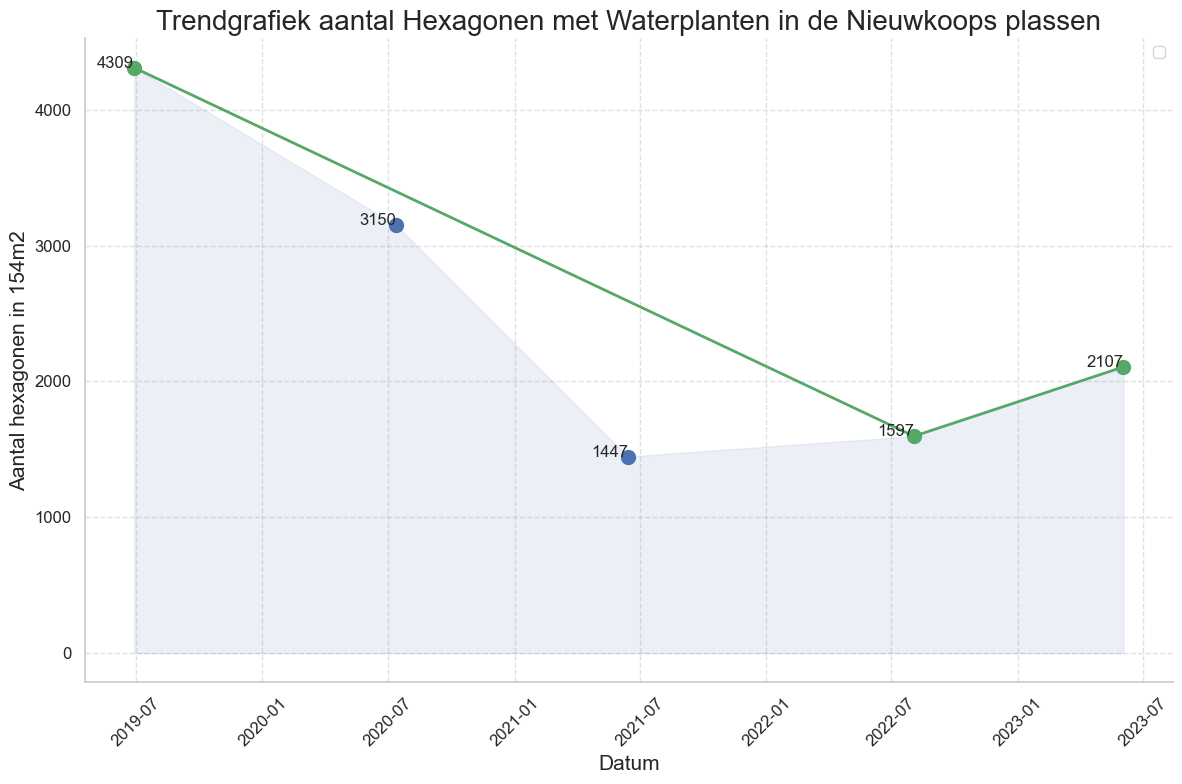

In [30]:
# Set the style
sns.set(style="whitegrid")

# Plot the trend graph
plt.figure(figsize=(12, 8))

# Plot segments with different colors
plt.plot(df[df['Date'].dt.year != 2020][df['Date'].dt.year != 2021]['Date'], 
         df[df['Date'].dt.year != 2020][df['Date'].dt.year != 2021]["Hexagons"], 
         marker='o', linestyle='-', color='g', linewidth=2, markersize=10)

plt.plot(df[(df['Date'].dt.year == 2020)]['Date'], 
         df[df['Date'].dt.year == 2020]["Hexagons"], 
         marker='o', linestyle='-', color='b', linewidth=2, markersize=10)

plt.plot(df[df['Date'].dt.year == 2021]['Date'], 
         df[df['Date'].dt.year == 2021]["Hexagons"], 
         marker='o', linestyle='-', color='b', linewidth=2, markersize=10)

# Adding annotations for each point
for i in range(len(df)):
    plt.text(df['Date'][i], df["Hexagons"][i], f'{df["Hexagons"][i]}',   fontsize=12, ha='right')

# Adding a shaded area for the background
plt.fill_between(df['Date'], df["Hexagons"], color='b', alpha=0.1)

# Enhancing the grid and spines
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Titles and labels
plt.title('Trendgrafiek aantal Hexagonen met Waterplanten in de Nieuwkoops plassen', fontsize=20)
plt.xlabel('Datum', fontsize=15)
plt.ylabel("Aantal hexagonen in 154m2", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend()

# Save the plot
plt.tight_layout()
plt.savefig('trend_graph_waterplanten_colored.png', dpi=300)  # You can change the filename and format here

# Show the plot
plt.show()